In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import numpy as np

In [14]:
data_path = '조윤기_data/household_power_consumption.txt'

data = pd.read_csv(data_path, sep=';')
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [16]:
data = data[['Date', 'Global_active_power', 'Global_reactive_power']]
data = data[data['Global_active_power']!='?']

In [17]:
import re
pattern = '([0-9]+)/([0-9]+)/([0-9]+)'
p = re.compile(pattern)

data['Day'] = data['Date'].transform(lambda x: p.match(x).group(1))
data['Month'] = data['Date'].transform(lambda x: p.match(x).group(2))
data['Year'] = data['Date'].transform(lambda x: p.match(x).group(3))

In [18]:
data = data[data['Year']=='2009']

In [19]:
data.head()

,Date,Global_active_power,Global_reactive_power,Day,Month,Year
1074636,1/1/2009,0.484,0.062,1,1,2009
1074637,1/1/2009,0.484,0.062,1,1,2009
1074638,1/1/2009,0.482,0.062,1,1,2009
1074639,1/1/2009,0.482,0.060,1,1,2009
1074640,1/1/2009,0.482,0.062,1,1,2009


# 1. barplot

In [20]:
for col in data.columns:
    if col=='Date':
        continue
    if col=='Global_active_power' or col=='Global_reactive_power':
        data[col] = data[col].astype('float')
    else:
        data[col] = data[col].astype('int')

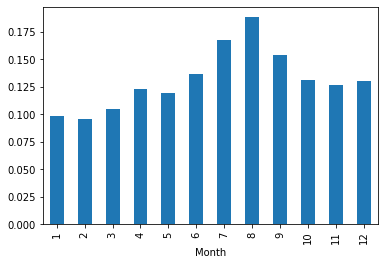

In [21]:
data.groupby('Month')['Global_reactive_power'].mean().plot(kind='bar')

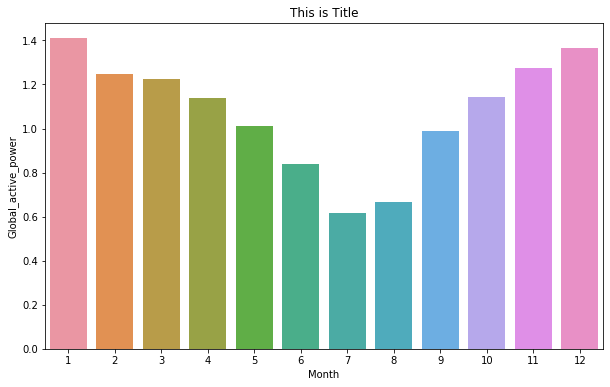

In [22]:
plt.figure(figsize=(10,6))
plt.title("This is Title")

sns.barplot(data=data, x='Month', y='Global_active_power', ci=None)

# 2. heatmap

In [23]:
data_month = data.groupby('Month')[['Global_active_power', 'Global_reactive_power']].mean()
data_month

,Global_active_power,Global_reactive_power
Month,,
1,1.410202,0.098491
2,1.247568,0.095844
3,1.226735,0.104337
4,1.140690,0.123029
5,1.012856,0.119584
6,0.840756,0.136095
7,0.618121,0.167756
8,0.664619,0.188426
9,0.986841,0.153901


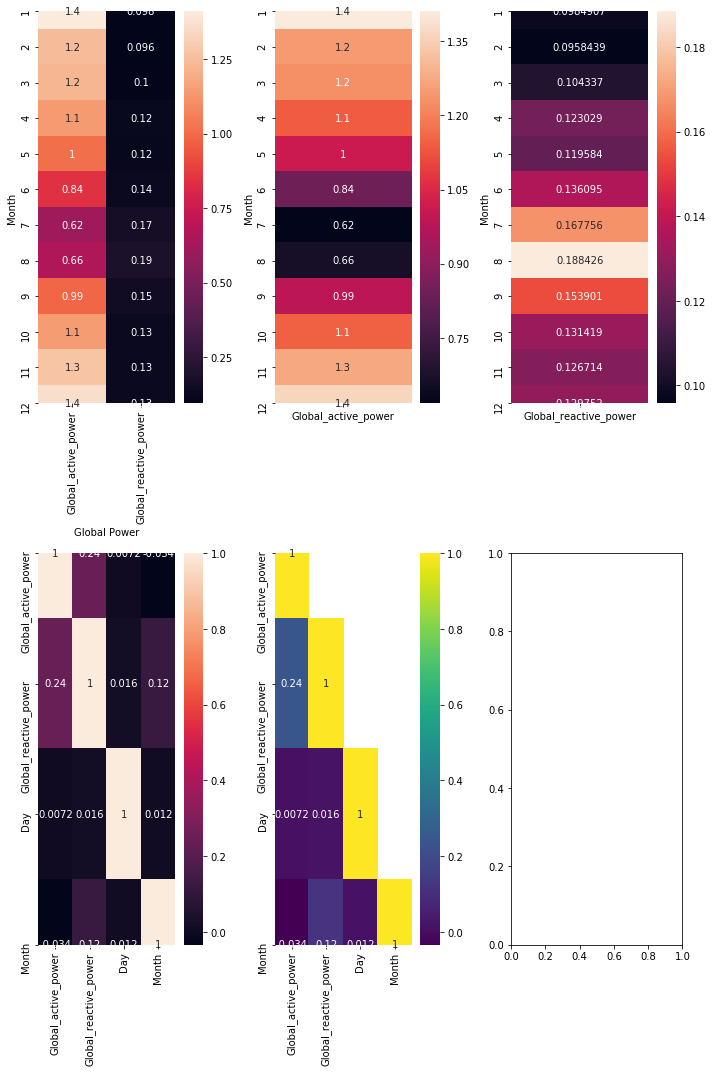

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(10,15)

data_corr = data.iloc[:,1:-1].corr()

## subplot0. 월별 Global Power
sns.heatmap(data=data_month, annot=True, ax=ax[0][0])
ax[0][0].set_xlabel('Global Power')

## subplot1,2 월별 Global Power (single column)
sns.heatmap(data=data_month[['Global_active_power']], annot=True, ax=ax[0][1])
sns.heatmap(data=data_month[['Global_reactive_power']], fmt="g", annot=True, ax=ax[0][2])

## subplot3. corr matrix
sns.heatmap(data=data_corr, annot=True, ax=ax[1][0])

## subplot4. heatmap 대각선 위로 제거
mask = np.array(data_corr)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data_corr, annot=True, mask=mask, cmap='viridis', ax=ax[1][1])


fig.tight_layout()